In [389]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import datetime
import time
import matplotlib.pyplot as plt

In [390]:
df = pd.read_csv('Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [391]:
lbl_encoder = LabelEncoder()
df['WeekStatus'] = lbl_encoder.fit_transform(df['WeekStatus'])
df['WeekStatus'].value_counts()

WeekStatus
0    25056
1     9984
Name: count, dtype: int64

In [392]:
lbl_encoder = LabelEncoder()
df['Day_of_week'] = lbl_encoder.fit_transform(df['Day_of_week'])
df['Day_of_week'].value_counts()

Day_of_week
1    5088
5    4992
6    4992
4    4992
0    4992
2    4992
3    4992
Name: count, dtype: int64

In [393]:
lbl_encoder = LabelEncoder()
df['Load_Type'] = lbl_encoder.fit_transform(df['Load_Type'])
df['Load_Type'].value_counts()

Load_Type
0    18072
2     9696
1     7272
Name: count, dtype: int64

In [394]:
def time_to_sec(x):
    x = time.strptime(str(x), '%H:%M:%S')
    res = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return res

In [395]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

df['day'] = pd.to_datetime(df['date']).dt.day_of_year
df['month'] = pd.to_datetime(df['date']).dt.month
df['time'] = pd.to_datetime(df['date']).dt.time

df['day'] = pd.to_numeric(df['day'])
df['month'] = pd.to_numeric(df['month'])

df['time'] = df['time'].apply(lambda x: time_to_sec(x))

df = df.drop('date', axis=1)

df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,time
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0,1,1,900.0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0,1,1,1800.0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0,1,1,2700.0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0,1,1,3600.0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0,1,1,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0,365,12,82800.0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0,365,12,83700.0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0,365,12,84600.0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0,365,12,85500.0


In [396]:
n = 10000
nu = 0.1
trees = []
PARAMS = ['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'day', 'month', 'time']
df['y_pred'] = df['Usage_kWh'].mean()

for i in range(n):
    df['r'] = df['Usage_kWh'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[PARAMS], df['r'])
    df['y_pred'] += nu * tree.predict(df[PARAMS])
    trees.append(tree)
    print(f'{i + 1}: MAE: {mean_absolute_error(df['Usage_kWh'], df['y_pred'])}')

1: MAE: 25.857764182162473
2: MAE: 23.459817284246036
3: MAE: 21.8390297381096
4: MAE: 19.961462660269017
5: MAE: 18.612960053925242
6: MAE: 16.871558037199684
7: MAE: 16.134777781304816
8: MAE: 14.742789237484844
9: MAE: 14.103244420757507
10: MAE: 12.855641138113272
11: MAE: 11.964899575616673
12: MAE: 11.44526088274782
13: MAE: 10.453435319620805
14: MAE: 9.999669174317242
15: MAE: 9.171704874023279
16: MAE: 8.892090510525199
17: MAE: 8.257950945320983
18: MAE: 8.01171754786315
19: MAE: 7.413604646400264
20: MAE: 7.092695848452929
21: MAE: 6.7050095340179565
22: MAE: 6.508881955088268
23: MAE: 6.073640834617252
24: MAE: 5.900446959464912
25: MAE: 5.5354176197209055
26: MAE: 5.30087584372651
27: MAE: 5.15501823778379
28: MAE: 4.870946619096702
29: MAE: 4.742867675751441
30: MAE: 4.53941127388163
31: MAE: 4.406355685554495
32: MAE: 4.3538888440666925
33: MAE: 4.154363814271016
34: MAE: 4.050161414014875
35: MAE: 4.005021772299241
36: MAE: 3.8443488837848006
37: MAE: 3.774086587318364


In [397]:
# pd.set_option('display.max_rows', 150)
# df.head(150)

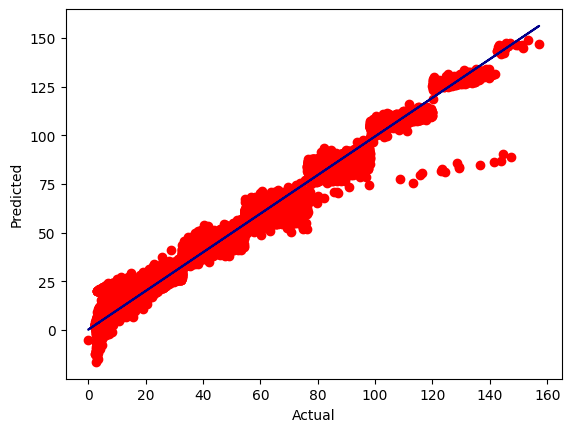

In [398]:
x = df['Usage_kWh']
y = df['y_pred']
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()